In [2]:
%matplotlib notebook

from numpy import *
from os import path
home = path.expanduser("~")
from matplotlib import animation
import matplotlib.pyplot as plt

# change the following line to your working folder
working_path = '/Users/chunshen/Desktop/JETSCAPE/JETSCAPE-public/build'

In [3]:
# data preparation
data = fromfile(path.join(working_path, "evolution_for_movie_xyeta.dat"), dtype=float32)
data = data.reshape(-1, 14)
tau_list = unique(data[:, 0])
ntau = len(tau_list)
neta = 1
nx   = 101
ny   = 101
eta_size = 1.
x_size   = 20.0
y_size   = 20.0
dx   = x_size/(nx - 1)
dy   = y_size/(ny - 1)
deta = eta_size/neta
ed = zeros([ntau, neta, nx, ny])
T  = zeros([ntau, neta, nx, ny])
for itau, tau_local in enumerate(tau_list):
    idx = (data[:, 0] == tau_local)
    data_cut = data[idx, :]
    for igrid in range(len(data_cut[:, 0])):
        x_idx   = int((data_cut[igrid, 1] + x_size/2.)/dx)
        y_idx   = int((data_cut[igrid, 2] + y_size/2.)/dy)
        eta_idx = int((data_cut[igrid, 3] + eta_size/2.)/deta)
        ed[itau, eta_idx, x_idx, y_idx] = data_cut[igrid, 5]
        T[itau, eta_idx, x_idx, y_idx]  = data_cut[igrid, 7]
print("Read in data completed.")
print("tau_min = {0:.3f} fm, tau_max = {1:.3f} fm, ntau = {2:d}".format(
                                            tau_list[0], tau_list[-1], ntau))
x = linspace(-10, 10, 101)
y = linspace(-10, 10, 101)
X, Y = meshgrid(x, y)

Read in data completed.
tau_min = 0.600 fm, tau_max = 11.280 fm, ntau = 268


### make a 2D contour plot for initial temperature distribution in the transverse plane

<IPython.core.display.Javascript object>


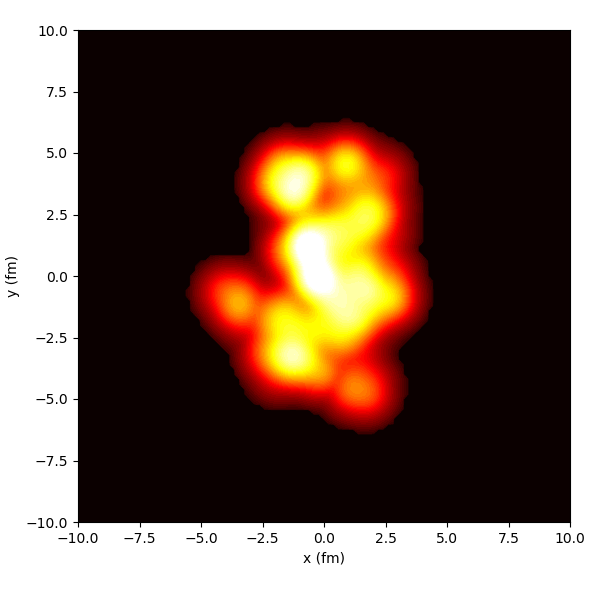

Text(0,0.5,'y (fm)')

In [37]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes([0.13, 0.13, 0.82, 0.82])
levels = linspace(0.1, 0.5, 50)
cont = plt.contourf(X, Y, T[0, 0, :, :].transpose(), levels, cmap='hot', extend='both')
plt.xlabel("x (fm)")
plt.ylabel("y (fm)")

### A 2D contour plot for $\tau$ vs x.

<IPython.core.display.Javascript object>


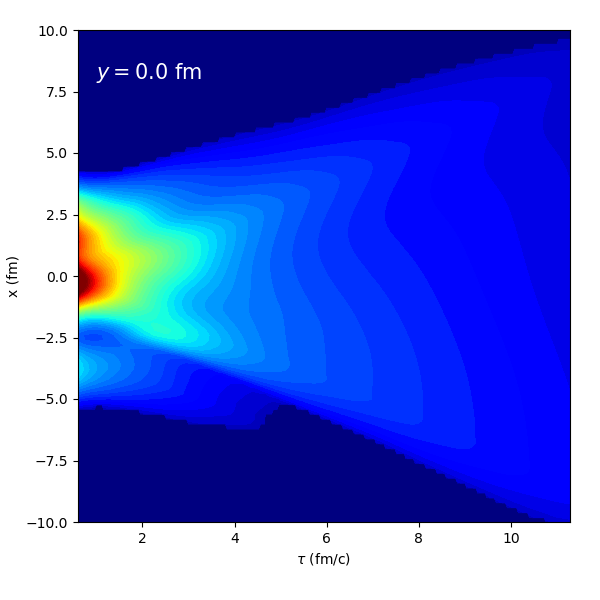

Text(1,8,'$y = 0.0$ fm')

In [53]:
Tau, X1 = meshgrid(tau_list, x)
y_idx = 50
fig = plt.figure(figsize=(6, 6))
ax = plt.axes([0.13, 0.13, 0.82, 0.82])
levels = linspace(0.1, 0.5, 50)
cont = plt.contourf(Tau, X1, T[:, 0, :, 50].transpose(), levels, cmap='jet', extend='both')
plt.xlabel(r"$\tau$ (fm/c)")
plt.ylabel("x (fm)")
plt.text(1.0, 8.0, r'$y = {0:3.1f}$ fm'.format(y[y_idx]),
         color="w", fontsize=15)

## Generate a movie for temperature profile

<IPython.core.display.Javascript object>


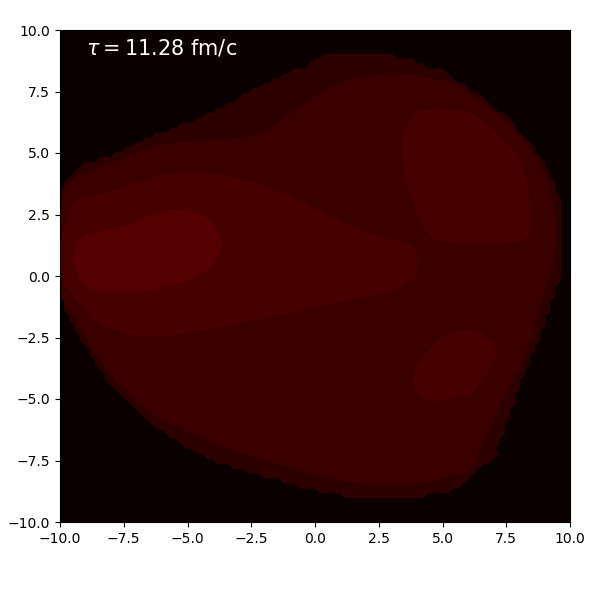

In [6]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes([0.13, 0.13, 0.82, 0.82])
levels = linspace(0.1, 0.5, 50)
cont = plt.contourf(X, Y, T[0, 0, :, :].transpose(), levels, cmap='hot', extend='both')
time_text = plt.text(-9, 9, r"$\tau = {0:4.2f}$ fm/c".format(tau_list[0]),
                     color="w", fontsize=15)
plt.xlabel("x (fm)")
plt.ylabel("y (fm)")

# animation function
def animate(i): 
    global cont, time_text
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(X, Y, T[i, 0, :, :].transpose(), levels, cmap='hot', extend='both')
    time_text.set_text(r"$\tau = {0:4.2f}$ fm/c".format(tau_list[i]))
    return cont, time_text  
anim = animation.FuncAnimation(fig, animate, frames=ntau, repeat=False)
#anim.save('animation.mp4', fps=24)